In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

DATA_DIR = "/Users/kaanankharwa/Desktop/CS_Stuff/403/403-Project2/"

### Consider how we handle NAN if results aren't quite what we want

In [7]:
#Read in data
df = pd.read_csv(DATA_DIR + "application_train.csv")
df.head()
print("Rows initially:", len(df))

#Pull target variable and remove from predictors
target_var = df["TARGET"]
df.drop(columns=["SK_ID_CURR"], inplace=True)

Rows initially: 307511


### Uncomment this chunk if you wish to standardize

In [8]:
standardized = True

numeric_columns = df.drop(columns=["TARGET"])._get_numeric_data().columns

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,-0.577538,0.142129,-0.478095,-0.166146,-0.507236,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-0.481452
1,0,Cash loans,F,N,N,-0.577538,0.426792,1.725450,0.592666,1.599974,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-1.016414
2,0,Revolving loans,M,Y,Y,-0.577538,-0.427196,-1.152888,-1.404649,-1.091895,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-1.016414
3,0,Cash loans,F,N,Y,-0.577538,-0.142533,-0.711430,0.177865,-0.653401,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,-0.577538,-0.199466,-0.213734,-0.361748,-0.068741,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-1.016414


### One Hot Encode and Create Variables for Categorical Values with NAN

In [9]:
#One Hot Encode and create variables for categorical values with NAN
df_dummies = pd.get_dummies(df, dummy_na=True)
df_dummies.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,1,-0.577538,0.142129,-0.478095,-0.166146,-0.507236,-0.149452,1.506880,-0.456215,0.379837,...,0,0,0,0,1,0,0,1,0,0
1,0,-0.577538,0.426792,1.725450,0.592666,1.599974,-1.252750,-0.166821,-0.460115,1.078697,...,0,0,0,0,0,0,0,1,0,0
2,0,-0.577538,-0.427196,-1.152888,-1.404649,-1.091895,-0.783451,-0.689509,-0.453299,0.206116,...,0,0,0,0,0,0,1,0,0,1
3,0,-0.577538,-0.142533,-0.711430,0.177865,-0.653401,-0.928991,-0.680114,-0.473217,-1.375829,...,0,0,0,0,0,0,1,0,0,1
4,0,-0.577538,-0.199466,-0.213734,-0.361748,-0.068741,0.563570,-0.892535,-0.473210,0.191639,...,0,0,0,0,0,0,1,0,0,1


### Replace NAN values in numerical variables with mean value of column 
* Too many NANs to drop them all so must impute somehow
* Consider trying median values

In [12]:
for col in df_dummies.columns:
    df_dummies[col] = df_dummies[col].fillna(df_dummies[col].mean())

### Drop Columns That Sum to Zero 
* They're all nan columns for categorical variables that don't have any nans

In [13]:
temp = pd.DataFrame(df_dummies.sum(axis=0))
df_dummies.drop(columns = list(temp[temp[0] == 0].index), inplace = True)

df_dummies.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,1,-0.577538,0.142129,-0.478095,-0.166146,-0.507236,-0.149452,1.506880,-0.456215,0.379837,...,0,0,0,0,1,0,0,1,0,0
1,0,-0.577538,0.426792,1.725450,0.592666,1.599974,-1.252750,-0.166821,-0.460115,1.078697,...,0,0,0,0,0,0,0,1,0,0
2,0,-0.577538,-0.427196,-1.152888,-1.404649,-1.091895,-0.783451,-0.689509,-0.453299,0.206116,...,0,0,0,0,0,0,1,0,0,1
3,0,-0.577538,-0.142533,-0.711430,0.177865,-0.653401,-0.928991,-0.680114,-0.473217,-1.375829,...,0,0,0,0,0,0,1,0,0,1
4,0,-0.577538,-0.199466,-0.213734,-0.361748,-0.068741,0.563570,-0.892535,-0.473210,0.191639,...,0,0,0,0,0,0,1,0,0,1


### Save Cleaned Data

In [14]:
if standardized:
    df_dummies.to_csv("Standardized_Cleaned_Data.csv")
else:
    df_dummies.to_csv("Non_Standardized_Cleaned_Data.csv")

## EDA
* correlations

In [15]:
corrs = df_dummies.corr()["TARGET"]
corrs.sort_values()

EXT_SOURCE_2                           -0.160303
EXT_SOURCE_3                           -0.157397
EXT_SOURCE_1                           -0.099152
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
                                          ...   
NAME_INCOME_TYPE_Working                0.057481
REGION_RATING_CLIENT                    0.058899
REGION_RATING_CLIENT_W_CITY             0.060893
DAYS_BIRTH                              0.078239
TARGET                                  1.000000
Name: TARGET, Length: 251, dtype: float64

# Training

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from math import log2
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

### Read in Data
* Makes us able to skip the first part for future runs

In [2]:
df = pd.read_csv("Standardized_Cleaned_Data.csv")
# df = pd.read_csv("Non_Standardized_Cleaned_Data.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

In [13]:
def gradient_descent_logistic(X, y, learning_rate_val, threshold):
  betas = np.matrix(np.zeros(X.shape[1]))
  learning_rate = np.array([-1 * learning_rate_val] * betas.shape[1])
  stop = False
  iterations = 0
  while not stop:
    y_hat = np.array(X * betas.transpose()).flatten()
    exp = np.exp(y_hat)
    pi = (exp / (1 + exp))
    errors = np.matrix(y-pi)
    gradient = np.array((errors * X) / X.shape[0])[0]
    gradient_total = np.sum(abs(gradient))
    if gradient_total < threshold:
      stop = True
    betas = -1*(gradient * learning_rate) + betas
    iterations += 1
  return betas

def gradient_descent_logistic_with_penalty(X, y, learning_rate_val, threshold, L):
  betas = np.matrix(np.zeros(X.shape[1]))
  learning_rate = np.array([-1 * learning_rate_val] * betas.shape[1])
  stop = False
  iterations = 0
  while not stop:
    y_hat = np.array(X * betas.transpose()).flatten()
    exp = np.exp(y_hat)
    pi = (exp / (1 + exp))
    errors = np.matrix(y-pi)
    gradient = np.array((errors * X) / X.shape[0])[0]
    beta_vals = np.array(betas)[0]
    for x in range(len(gradient)):
      if x < 0:
        gradient[x] -= beta_vals[x] * L
      elif x > 0:
        gradient[x] += beta_vals[x] * L
    gradient_total = np.sum(abs(gradient))
    if (gradient_total < threshold) or (iterations > 1000):
      stop = True
    betas = -1*(gradient * learning_rate) + betas
    iterations += 1
    print(gradient_total)
  return betas

def lda_kaanan(x, y):
  x["Target"] = y
  ones = x[x["Target"] == 1].drop(columns=["Target"])
  zeros = x[x["Target"] == 0].drop(columns=["Target"])

  sigma_ones = np.cov(np.matrix(ones).transpose()) * (ones.shape[0] - 1)
  sigma_zeros = np.cov(np.matrix(zeros).transpose()) * (zeros.shape[0] - 1)
  pooled_cov = (sigma_ones + sigma_zeros) / (ones.shape[0] + zeros.shape[0] - 2)
  pooled_cov_inv = np.matrix(np.linalg.inv(pooled_cov))
  
  mean1 = np.matrix(np.mean(ones, axis = 0))
  mean2 = np.matrix(np.mean(zeros, axis = 0))

  w = (mean1 - mean2) * pooled_cov_inv
  log_prob = log2(ones.shape[0]/zeros.shape[0])
  c = np.array(.5 * ((mean1-mean2) * pooled_cov_inv * np.matrix(mean1 + mean2).transpose())).flatten()[0] - log_prob
  return (w, c)

def lda_model(X_train, y_train):
  # df_heart_cut = df_heart.iloc[:, 0:13]
  X_train['output'] = y_train
  group0 = X_train[X_train['output']==0]
  group1 = X_train[X_train['output']==1]
  print(1)
  group1_y = group1["output"]
  group0_y = group0["output"]
  group1_x = group1.drop(columns = ["output"])
  group0_x = group0.drop(columns = ["output"])
  print(2)
  cov_group1 = np.array(np.cov(np.matrix(group1_x).transpose()) * (len(group1_x) - 1))
  cov_group0 = np.array(np.cov(np.matrix(group0_x).transpose()) * (len(group0_x) - 1))
  pooled_cov = (cov_group1+cov_group0) / ((len(group1_x))+(len(group0_x))-2)
  group1_mean = group1_x.mean().values 
  group0_mean = group0_x.mean().values
  vec_diff = (group1_mean - group0_mean)
  vec_sum = (group1_mean + group0_mean)

 
  p1 = len(group1_x)/len(X_train)
  p0 = len(group0_x)/len(X_train)
  print(3)
  w = np.matmul(np.linalg.inv(pooled_cov),(group1_mean - group0_mean))
  c = np.log(p1/p0) - (0.5 * np.matmul(vec_sum.transpose(), w)) 
  print(4)
  return (w, c)

In [4]:
def get_metrics(predictions, truth):
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  for x in range(len(predictions)):
    if truth[x] == 0:
      if predictions[x] == 0:
        tn += 1
      else:
        fp += 1
    else:
      if predictions[x] == 1:
        tp += 1
      else:
        fn += 1
  if (tp + fp) != 0:
    precision = tp / (tp + fp)
  else:
    precision = 0
  recall = tp / (tp + fn)
  f1_score = (precision * recall) / (precision + recall)
  print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1_score)
  RocCurveDisplay.from_predictions(truth, predictions)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["TARGET"]), df["TARGET"], test_size = .2, random_state = 42)
#df.drop(columns=["TARGET"])

In [8]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = .2, random_state = 42)

Accuracy: 0.5370716637535059
Precision: 0.08493951880898577
Recall: 0.4742701632855022
F1 Score: 0.07203787907256398


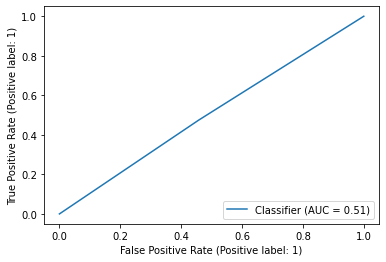

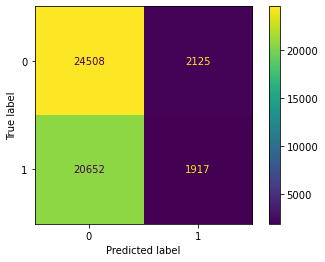

In [9]:
w, c = lda_kaanan(X_train, y_train)
nums = np.array((np.matrix(X_validation) * w.transpose()) - c).flatten()
predictions = []
for x in nums:
  if x > 0:
    predictions.append(1)
  else:
    predictions.append(0)
get_metrics(predictions, np.array(y_validation))
cm = confusion_matrix(predictions, np.array(y_validation))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [14]:
w, c = lda_model(X_train, y_train)
print("Done")
nums = np.array((np.matrix(X_validation) * w.transpose()) - c).flatten()
print("done 2")
predictions = []
for x in nums:
  if x > 0:
    predictions.append(1)
  else:
    predictions.append(0)
get_metrics(predictions, np.array(y_validation))
cm = confusion_matrix(predictions, np.array(y_validation))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

1
2
3


LinAlgError: Singular matrix

In [24]:
y_train

9717      0
203356    0
81757     0
84860     0
234668    0
         ..
163061    1
96173     0
204206    0
219751    0
255       1
Name: TARGET, Length: 196806, dtype: int64

In [25]:
X_train_matrix = np.matrix(X_train)
y_train_matrix = np.matrix(y_train)

new_betas = gradient_descent_logistic_with_penalty(X_train_matrix, y_train, .1, .05, .001)

7.211549485126472
5.895742251779761
4.877657295824249
4.0992285229356575
3.500520811793623
3.0326326451289334
2.6606583197598193
2.3598141785353874
2.112484227682689
1.9065642791662905
1.732943673467222
1.5847880032527724
1.4571780837445463
1.3463519538658129
1.2493192885480275
1.163743031900199
1.0877945229891135
1.0200109829461899
0.9592058965255771
0.9044076121962261
0.8548134125897393
0.8097658225378521
0.7687002018983562
0.7311333483803727
0.6966623639117302
0.6649550652636446
0.6357313722401905
0.6087680200943382
0.5838092075531764
0.5606595637817169
0.5391925844097493
0.5191987014148814
0.5006431278534598
0.4835015200221736
0.46755429119846587
0.4527085276534905
0.43879450846088985
0.42573382883936467
0.4134364996088835
0.40187334255036156
0.39095866598416007
0.3806340120280931
0.37085573444510916
0.36160171274161906
0.3528106742502273
0.34448483125102763
0.3369673071782754
0.32992452537139716
0.32326382117754304
0.31693325974127606
0.31093855811857396
0.30529410672513024
0.2999

0.0686167412238957
0.0684908082220118
0.06836534671253133
0.06824027662528956
0.06811559621428072
0.06799130374463441
0.06786739749251786
0.06774387574504034
0.06762073680015795
0.06749797896658002
0.06737560056367621
0.06725359992138452
0.06713197538012072
0.06701072529068827
0.06688984801419007
0.06676963342439854
0.06665009952448345
0.0665309270808302
0.06641211456440523
0.06629366045535039
0.06617556324290538
0.06605782142533101
0.06594043350983333
0.06582339801248877
0.06570671345816972
0.06559037838047158
0.06547478473156051
0.0653596718674857
0.0652448977353215
0.06513046096440453
0.06501636019187065
0.06490259406259163
0.06478916122911291
0.06467606035159168
0.06456348576675756
0.06445133237555928
0.0643395066525237
0.06422800728420386
0.06411683296452528
0.06400598239472677
0.06389545428330265
0.06378524734594512
0.06367536030548807
0.06356579189185
0.06345654084197933
0.06334760589979863
0.06323898581615112
0.06313067934874579
0.06302268526210535
0.06291500232751246
0.0628076

In [26]:
log_odds = np.matrix(X_train) * new_betas.transpose()
exp = np.exp(log_odds)
pi = (exp / (1 + exp))
pd.Series([1 if x > .5 else 0 for x in pi]).value_counts()

0    196530
1       276
dtype: int64

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_matrix, y_train)

/Users/kaanankharwa/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/kaanankharwa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train_matrix, y_train)

/Users/kaanankharwa/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/kaanankharwa/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [ ]:
pd.Series(clf.predict(X_train_matrix[:, :])).value_counts()

In [42]:
target_var.value_counts()[1]/target_var.value_counts()[0]

0.08781828601345662

In [79]:
y_train.value_counts()

0    180972
1     15834
Name: TARGET, dtype: int64

In [73]:
#Consider removing variables that are highly correlated with other variables
df_corr = df_.corr()
df_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
CNT_CHILDREN,1.000000,0.012882,0.002145,0.021374,-0.001826,-0.025573,0.330938,-0.239818,0.183395,-0.028019,...,-0.000709,0.001607,-0.002032,-0.020892,-0.025088,0.011036,0.036713,-0.038644,0.004525,0.037885
AMT_INCOME_TOTAL,0.012882,1.000000,0.156870,0.191657,0.159600,0.074796,0.027261,-0.064223,0.027805,0.008506,...,0.006149,0.023886,0.003886,0.032753,0.016523,-0.003369,-0.048745,0.050174,-0.002894,-0.049706
AMT_CREDIT,0.002145,0.156870,1.000000,0.770127,0.986588,0.099738,-0.055436,-0.066838,0.009621,-0.006575,...,0.007987,0.027255,0.005799,0.046644,0.009756,-0.007373,-0.055586,0.058256,-0.004308,-0.057547
AMT_ANNUITY,0.021374,0.191657,0.770127,1.000000,0.774661,0.118424,0.009445,-0.104331,0.038513,0.011268,...,0.010077,0.035318,0.005968,0.054987,0.009188,-0.007711,-0.063930,0.068144,-0.003910,-0.067511
AMT_GOODS_PRICE,-0.001826,0.159600,0.986588,0.774661,1.000000,0.103482,-0.053416,-0.064826,0.011561,-0.009262,...,0.009953,0.028299,0.005877,0.049740,0.012882,-0.009128,-0.060514,0.062849,-0.004846,-0.062050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WALLSMATERIAL_MODE_Wooden,0.011036,-0.003369,-0.007373,-0.007711,-0.009128,-0.056263,0.008758,-0.002846,0.000159,0.012702,...,-0.011554,-0.010162,-0.009710,-0.069666,-0.068843,1.000000,-0.135474,0.078964,0.273271,-0.126455
WALLSMATERIAL_MODE_nan,0.036713,-0.048745,-0.055586,-0.063930,-0.060514,-0.108545,0.019602,0.010224,0.067334,0.014851,...,-0.088204,-0.077575,-0.074123,-0.531832,-0.525545,-0.135474,1.000000,-0.924401,-0.048372,0.933422
EMERGENCYSTATE_MODE_No,-0.038644,0.050174,0.058256,0.068144,0.062849,0.103513,-0.019852,-0.010907,-0.069039,-0.015230,...,0.076786,0.073260,0.060550,0.502903,0.491544,0.078964,-0.924401,1.000000,-0.090624,-0.984943
EMERGENCYSTATE_MODE_Yes,0.004525,-0.002894,-0.004308,-0.003910,-0.004846,-0.029932,0.005434,-0.003571,-0.006273,0.006851,...,0.031648,-0.005178,0.049521,-0.039280,-0.007605,0.273271,-0.048372,-0.090624,1.000000,-0.082907


In [74]:
#Take absolute value of correlations
df_corr_abs = df_corr.abs()

In [93]:
#
temp = df_corr_abs
temp
for col in temp.columns:
    temp[col] = temp[col].sort_values(ascending=False)[1:6]

temp.mean(axis=0).sort_values(ascending=False).head(20)

LIVINGAREA_AVG                   0.887484
LIVINGAREA_MEDI                  0.887324
APARTMENTS_AVG                   0.875282
APARTMENTS_MEDI                  0.871326
LIVINGAREA_MODE                  0.871326
TOTALAREA_MODE                   0.869341
APARTMENTS_MODE                  0.866186
ELEVATORS_MODE                   0.823251
ELEVATORS_AVG                    0.819636
ELEVATORS_MEDI                   0.815055
LIVINGAPARTMENTS_MODE            0.750896
LIVINGAPARTMENTS_MEDI            0.737680
LIVINGAPARTMENTS_AVG             0.732650
WALLSMATERIAL_MODE_nan           0.682478
HOUSETYPE_MODE_nan               0.679362
HOUSETYPE_MODE_block of flats    0.674516
EMERGENCYSTATE_MODE_nan          0.645410
FONDKAPREMONT_MODE_nan           0.645410
EMERGENCYSTATE_MODE_No           0.645381
FLOORSMAX_MODE                   0.638215
dtype: float64

In [98]:
df[["LIVINGAPARTMENTS_MEDI", "LIVINGAPARTMENTS_AVG", "LIVINGAPARTMENTS_MODE"]]

,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE
0,0.0205,0.0202,0.0220
1,0.0787,0.0773,0.0790
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
307506,0.1509,0.1484,0.0882
307507,0.0205,0.0202,0.0220
307508,0.0855,0.0841,0.0918
307509,NaN,NaN,NaN


In [95]:
weird_vars = []
for col in temp.columns:
    if "MODE" in col or "MEDI" in col or "AVG" in col:
        weird_vars.append(col)
        
weird_vars

['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'FONDKAPREMONT_MODE_not specified',
 'FONDKAPREMONT_MODE_org spec acco

In [96]:
df["EMERGENCYSTATE_MODE"]

0          No
1          No
2         NaN
3         NaN
4         NaN
         ... 
307506     No
307507     No
307508     No
307509     No
307510     No
Name: EMERGENCYSTATE_MODE, Length: 307511, dtype: object

In [82]:
#This is a mess, let's work on it
corr_dict = {}
for col in df_corr_abs.columns:
    corr_dict[col] = (df_corr_abs[col].sort_values(ascending = False).index[1], df_corr_abs[col].sort_values(ascending = False)[1])

highest_corrs = []
for val in corr_dict.values():
    highest_corrs.append(val[1])

sorted(highest_corrs)

[0.009706258820390544,
 0.010530906131240437,
 0.011058928656568849,
 0.011275414105436612,
 0.011466936858909002,
 0.01146984969983328,
 0.013094141708821722,
 0.014453429433199215,
 0.014611141295997464,
 0.014707845334371087,
 0.014878787777508647,
 0.015219257083813132,
 0.01587807600767065,
 0.016142001495559357,
 0.018049363474305677,
 0.019918568572964312,
 0.02242663942850155,
 0.026528840049437407,
 0.029205787940739636,
 0.03251547477822282,
 0.034458206073689,
 0.03498087394722537,
 0.03616073209148479,
 0.03674056481901469,
 0.03785482417533689,
 0.0389845350095574,
 0.04060216190954936,
 0.04084983554835195,
 0.04190139021996996,
 0.042379987828412034,
 0.04553483246007707,
 0.045909366542471054,
 0.045948970033035975,
 0.04689784270300796,
 0.051630035753355036,
 0.0544974753246741,
 0.05568055283133256,
 0.055821449221329235,
 0.058172451205915895,
 0.06096223634421087,
 0.0635192081742089,
 0.06513321547998097,
 0.06619660349783962,
 0.06762236373081022,
 0.067857475486

In [47]:
#Zero binary columns
count = 0
col_list = []
for col in df.columns:
    if len(df[col].value_counts()) == 2:
        if df[col].dtype != np.int64:
            col_list.append(col)
            count += 1
        
col_list

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'EMERGENCYSTATE_MODE']

In [49]:
#Zero binary columns
count = 0
col_list = []
for col in df.columns:
    if df[col].dtype != np.int64:
        col_list.append(col)
        count += 1

In [53]:
na_cat_vars = []
for col in df[col_list].columns:
    if df[col_list][col].isna().any():
        na_cat_vars.append(col)
        
na_cat_vars

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',